In [3]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

The follow runs are for BCE loss with varying embed dims.

In [4]:
runs = ["logs/train/runs/2023-08-08_20-32-58", "logs/train/runs/2023-08-09_02-52-26"]

In [5]:
metrics = [f"D:\\felix-ml\\{run}\\csv\\version_0\\metrics.csv" for run in runs]
           
dfs = [pd.read_csv(metric) for metric in metrics]

In [6]:
df2s = [df[~df["epoch"].isna()] for df in dfs]
df2s = [df2.drop(["step", "train/loss_step"], axis=1) for df2 in df2s]
dfms = [df2.melt("epoch", var_name="cols", value_name="loss") for df2 in df2s]
dfms = [dfm[~dfm["loss"].isna()] for dfm in dfms]

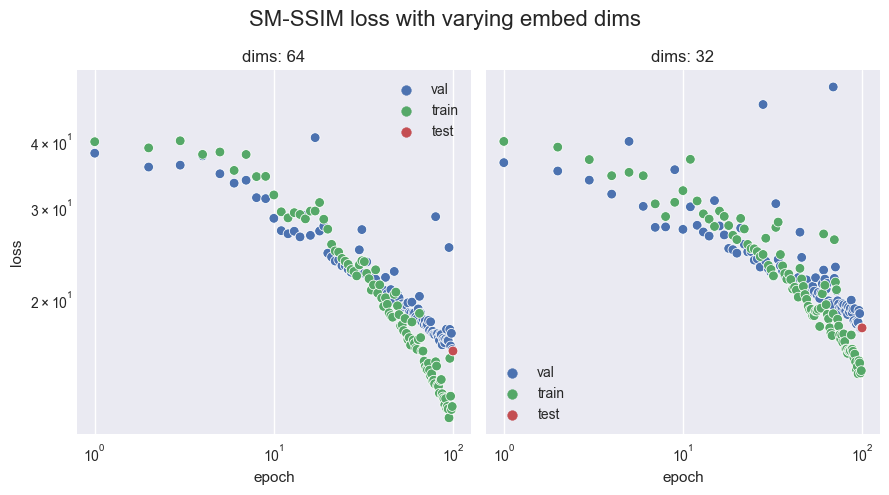

In [10]:
plt.style.use("seaborn-v0_8")

fig, axs = plt.subplots(1, len(runs), figsize=(9, 5), sharey=True)
fig.suptitle("SM-SSIM loss with varying embed dims", fontsize=16)
gs = []

for i, ax in enumerate(axs):
    g = sns.scatterplot(data=dfms[i], x="epoch", y="loss", hue="cols", ax=ax)
    gs.append(g)
    ax.set_title(f"dims: {['64', '32'][i]}")
    ax.set_xscale("log")
    ax.set_yscale("log")

for g in gs:
    handles, labels = g.get_legend_handles_labels()
    for i in range(len(labels)):
        labels[i] = labels[i][: labels[i].find("/")]
    g.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()